Data presented is after cleaning (RG1 was calculated for difference). 2nd Rain Gauge may actually be good as is. No need for editing.

In [2]:
import pandas as pd
import scipy.stats as stats

df = pd.read_excel(r"Cleaned_Tagoloan\20210101_20220101 Report\20210101_20220101 Report.xlsx", index_col=0)

df.head(5)

,Hour,Timestamp,Water Level,Rain Gauge 0,Rain Gauge 1,RG0_Diff,RG1_Diff,Corrected Water Level
0,0,2021/01/01 00:00:00,1.869690,1481.0,NaN,0.0,0.0,1.869690
1,1,2021/01/01 01:00:00,1.941315,1481.0,NaN,0.0,0.0,1.941315
2,2,2021/01/01 02:00:00,1.917440,1481.0,0.0,0.0,0.0,1.917440
3,3,2021/01/01 03:00:00,1.869690,1481.0,0.0,0.0,0.0,1.869690
4,4,2021/01/01 04:00:00,1.893565,1481.0,0.0,0.0,0.0,1.893565


In [3]:
summ_df = df[['Timestamp','RG0_Diff','Rain Gauge 1']].fillna(0)
stats.pearsonr(summ_df['RG0_Diff'], summ_df['Rain Gauge 1'])

PearsonRResult(statistic=0.278930261340138, pvalue=2.703404196607868e-156)

In [4]:
def cum_sum(lst):
    summ = [lst[0]]
    for val in lst[1:]:
        summ.append(val+summ[-1])
    return summ

summ_df.set_index('Timestamp',inplace=True)
summ_df['Cumulative RG0'] = cum_sum(summ_df['RG0_Diff'])
summ_df['Cummulative RG1'] = cum_sum(summ_df['Rain Gauge 1'])
summ_df


,RG0_Diff,Rain Gauge 1,Cumulative RG0,Cummulative RG1
Timestamp,,,,
2021/01/01 00:00:00,0.0,0.000,0.0,0.000
2021/01/01 01:00:00,0.0,0.000,0.0,0.000
2021/01/01 02:00:00,0.0,0.000,0.0,0.000
2021/01/01 03:00:00,0.0,0.000,0.0,0.000
2021/01/01 04:00:00,0.0,0.000,0.0,0.000
...,...,...,...,...
2021/12/31 20:00:00,0.0,0.056,2089.2,1387.664
2021/12/31 21:00:00,0.0,0.056,2089.2,1387.720
2021/12/31 22:00:00,0.0,0.056,2089.2,1387.776


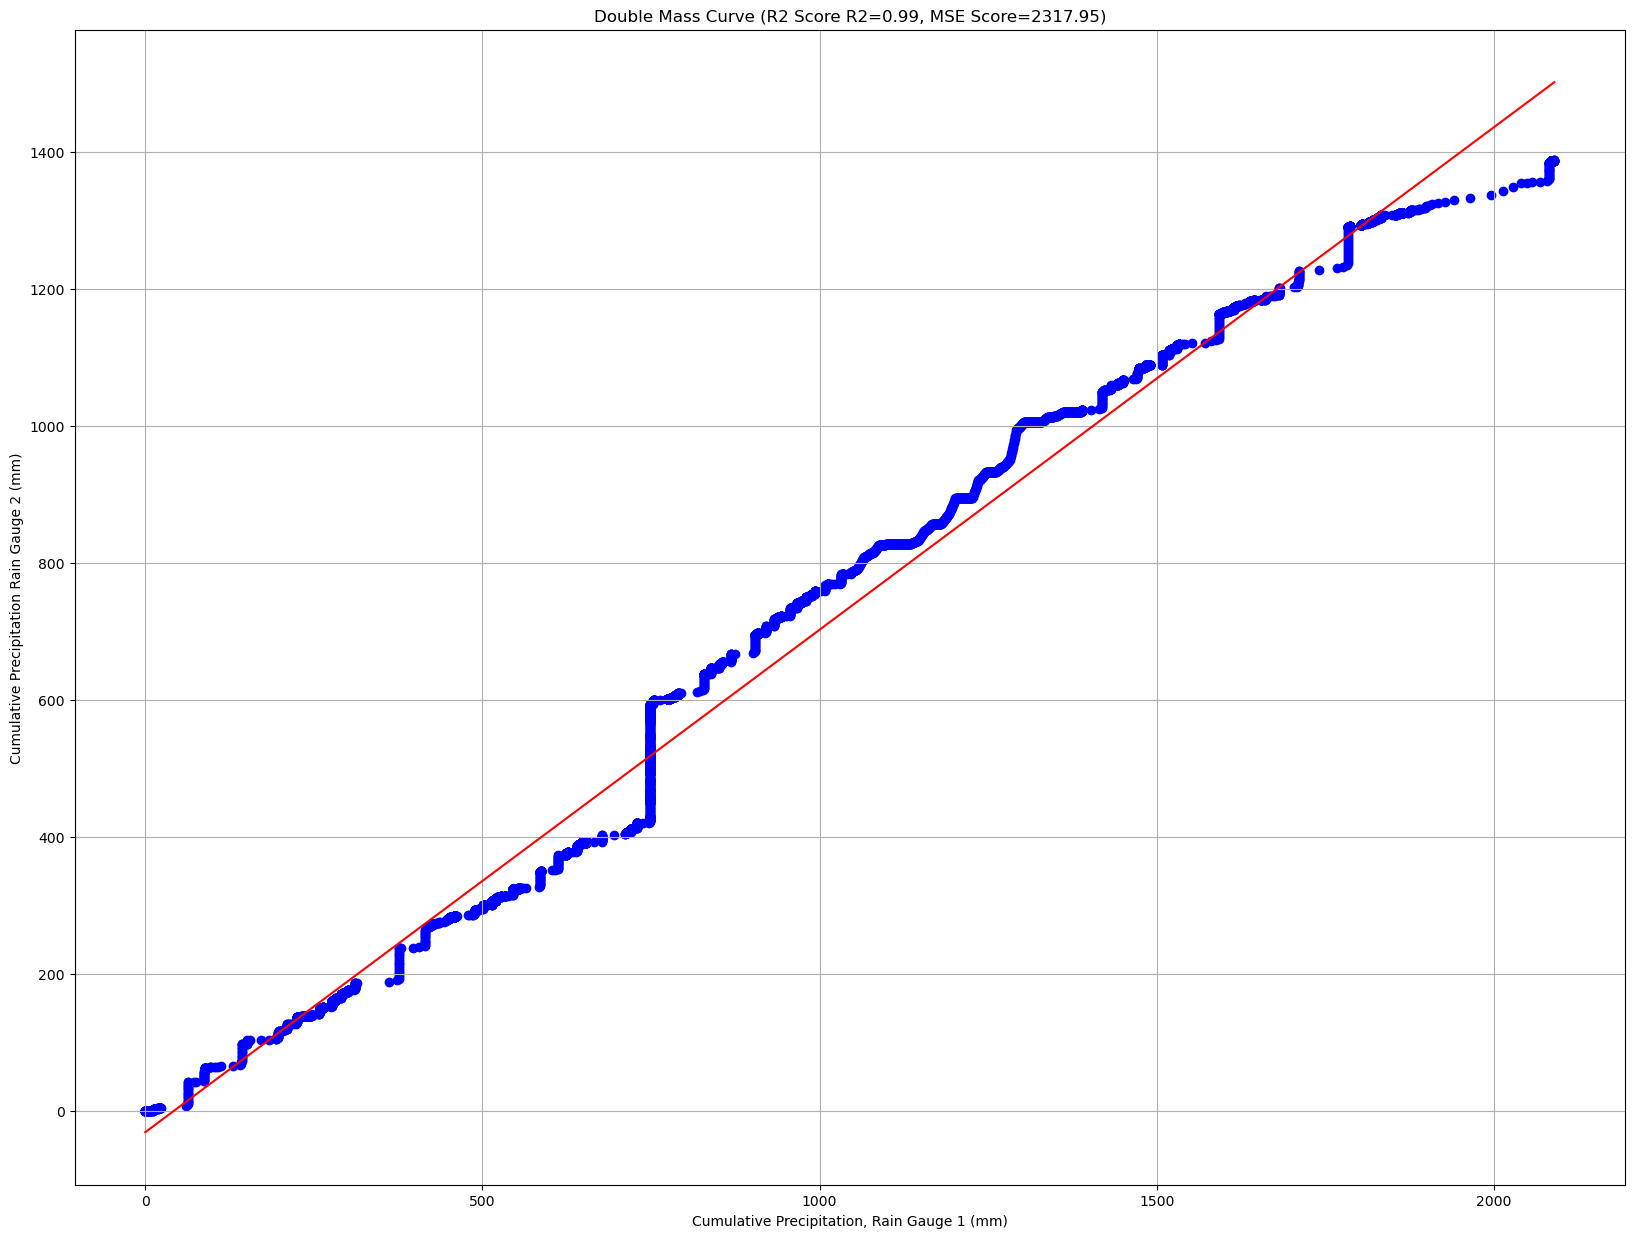

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

cumulative_rain_gauges = summ_df[['Cumulative RG0','Cummulative RG1']]

reg = LinearRegression()

y = cumulative_rain_gauges.pop('Cummulative RG1')
x = cumulative_rain_gauges

reg.fit(x,y)

y_pred = reg.predict(x)

r2 = r2_score(y,y_pred)
mse = mean_squared_error(y,y_pred)


fig,ax = plt.subplots(figsize=(20,15))

ax.scatter(x.iloc[:,0],y, color='blue')
# ax.plot(x.iloc[:,0],y, color='blue')
ax.plot(x.iloc[:,0],y_pred, color='r')
ax.set_title("Double Mass Curve (R2 Score R2={:.2f}, MSE Score={:.2f})".format(r2, mse))
ax.set_xlabel("Cumulative Precipitation, Rain Gauge 1 (mm)")
ax.set_ylabel("Cumulative Precipitation Rain Gauge 2 (mm)")
ax.grid(True)
plt.show()


In [6]:
cumulative_rain_gauges

,Cumulative RG0
Timestamp,
2021/01/01 00:00:00,0.0
2021/01/01 01:00:00,0.0
2021/01/01 02:00:00,0.0
2021/01/01 03:00:00,0.0
2021/01/01 04:00:00,0.0
...,...
2021/12/31 20:00:00,2089.2
2021/12/31 21:00:00,2089.2
2021/12/31 22:00:00,2089.2


## Part 2
Check for the nature of the Data for ALL Tagoloan Rain Gauge

In [7]:
rg2_dir = r"Rain Gauge\Tagoloan\Rain Gauge 2\Raw"
rg1_dir = r"Rain Gauge\Tagoloan\Rain Gauge 1\Raw"

In [8]:
import os
#Gets all excel files
def all_xl(directory):
    lst = []
    for file in os.listdir(directory):
        ext = file.split('.')[-1]
        if ext == 'xlsx':
            lst.append(os.path.join(directory,file))
    return lst

rg1_dfs = [pd.read_excel(file) for file in all_xl(rg1_dir)]
rg2_dfs = [pd.read_excel(file) for file in all_xl(rg2_dir)]



c:\Users\sulay\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\sulay\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\sulay\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\sulay\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\sulay\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains

In [9]:
df = rg1_dfs[1]
df['Diff'] = df['Sensor Value'].diff()
df['Diff'].sum()

112.40000000000003

In [10]:
df.loc[df['Diff']!=0]

,Station Name,Sensor Type,Sensor Value,Sensor ID,Units,Timestamp,Sensor Label,Diff
0,FGEN Tagoloan Gauge Station,Rain,207.2,46491,mm,2/5/2020 12:47:00 AM,Rain Gauge,NaN
27,FGEN Tagoloan Gauge Station,Rain,207.6,46491,mm,2/6/2020 3:47:00 AM,Rain Gauge,0.4
36,FGEN Tagoloan Gauge Station,Rain,208.4,46491,mm,2/6/2020 12:47:00 PM,Rain Gauge,0.8
40,FGEN Tagoloan Gauge Station,Rain,210.4,46491,mm,2/6/2020 4:47:00 PM,Rain Gauge,2.0
41,FGEN Tagoloan Gauge Station,Rain,225.2,46491,mm,2/6/2020 5:47:00 PM,Rain Gauge,14.8
42,FGEN Tagoloan Gauge Station,Rain,227.6,46491,mm,2/6/2020 6:47:00 PM,Rain Gauge,2.4
43,FGEN Tagoloan Gauge Station,Rain,229.6,46491,mm,2/6/2020 7:47:00 PM,Rain Gauge,2.0
44,FGEN Tagoloan Gauge Station,Rain,230.6,46491,mm,2/6/2020 8:47:00 PM,Rain Gauge,1.0
52,FGEN Tagoloan Gauge Station,Rain,231.0,46491,mm,2/7/2020 4:47:00 AM,Rain Gauge,0.4
53,FGEN Tagoloan Gauge Station,Rain,231.4,46491,mm,2/7/2020 5:47:00 AM,Rain Gauge,0.4


In [11]:
df = rg2_dfs[2]
df['Sensor Value'].sum()

76.92

In [12]:
df

,Station Name,Sensor Type,Sensor Value,Sensor ID,Units,Timestamp,Sensor Label
0,FGEN Tagoloan Gauge Station,DailyRain,0.0,1546480,mm,2/5/2020 12:59:59 AM,Rain Gauge 1
1,FGEN Tagoloan Gauge Station,DailyRain,0.0,1546480,mm,2/5/2020 1:59:59 AM,Rain Gauge 1
2,FGEN Tagoloan Gauge Station,DailyRain,0.0,1546480,mm,2/5/2020 2:59:59 AM,Rain Gauge 1
3,FGEN Tagoloan Gauge Station,DailyRain,0.0,1546480,mm,2/5/2020 3:59:59 AM,Rain Gauge 1
4,FGEN Tagoloan Gauge Station,DailyRain,0.0,1546480,mm,2/5/2020 4:59:59 AM,Rain Gauge 1
...,...,...,...,...,...,...,...
1178,FGEN Tagoloan Gauge Station,DailyRain,0.0,1546480,mm,3/25/2020 3:59:59 AM,Rain Gauge 1
1179,FGEN Tagoloan Gauge Station,DailyRain,0.0,1546480,mm,3/25/2020 4:59:59 AM,Rain Gauge 1
1180,FGEN Tagoloan Gauge Station,DailyRain,0.0,1546480,mm,3/25/2020 5:59:59 AM,Rain Gauge 1
1181,FGEN Tagoloan Gauge Station,DailyRain,0.0,1546480,mm,3/25/2020 6:59:59 AM,Rain Gauge 1


In [13]:
rg1_dfs[0]

,Station Name,Sensor Type,Sensor Value,Sensor ID,Units,Timestamp,Sensor Label
0,FGEN Tagoloan Gauge Station,Rain,207.2,46491,mm,1/27/2020 12:47:00 AM,Rain Gauge
1,FGEN Tagoloan Gauge Station,Rain,207.2,46491,mm,1/27/2020 1:47:00 AM,Rain Gauge
2,FGEN Tagoloan Gauge Station,Rain,207.2,46491,mm,1/27/2020 2:47:00 AM,Rain Gauge
3,FGEN Tagoloan Gauge Station,Rain,207.2,46491,mm,1/27/2020 3:47:00 AM,Rain Gauge
4,FGEN Tagoloan Gauge Station,Rain,207.2,46491,mm,1/27/2020 4:47:00 AM,Rain Gauge
...,...,...,...,...,...,...,...
222,FGEN Tagoloan Gauge Station,Rain,207.2,46491,mm,2/5/2020 6:47:00 AM,Rain Gauge
223,FGEN Tagoloan Gauge Station,Rain,207.2,46491,mm,2/5/2020 7:47:00 AM,Rain Gauge
224,FGEN Tagoloan Gauge Station,Rain,207.2,46491,mm,2/5/2020 8:47:00 AM,Rain Gauge
225,FGEN Tagoloan Gauge Station,Rain,207.2,46491,mm,2/5/2020 9:47:00 AM,Rain Gauge


: 